In [1]:
import os
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo

In [2]:
df = pd.read_csv('gdp.csv')

In [3]:
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [4]:
df.isnull().sum()

Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64

Check Description of Each Column

In [5]:
df['Country Name'].describe()

count                    11507
unique                     256
top       Hong Kong SAR, China
freq                        57
Name: Country Name, dtype: object

In [6]:
df['Country Code'].describe()

count     11507
unique      256
top         HKG
freq         57
Name: Country Code, dtype: object

In [7]:
df['Year'].min()

1960

In [8]:
df['Year'].max()

2016

Analysing Arab World

In [9]:
df_pr =  df[df["Country Name"] == 'Arab World']

<Axes: xlabel='Years', ylabel='GDP'>

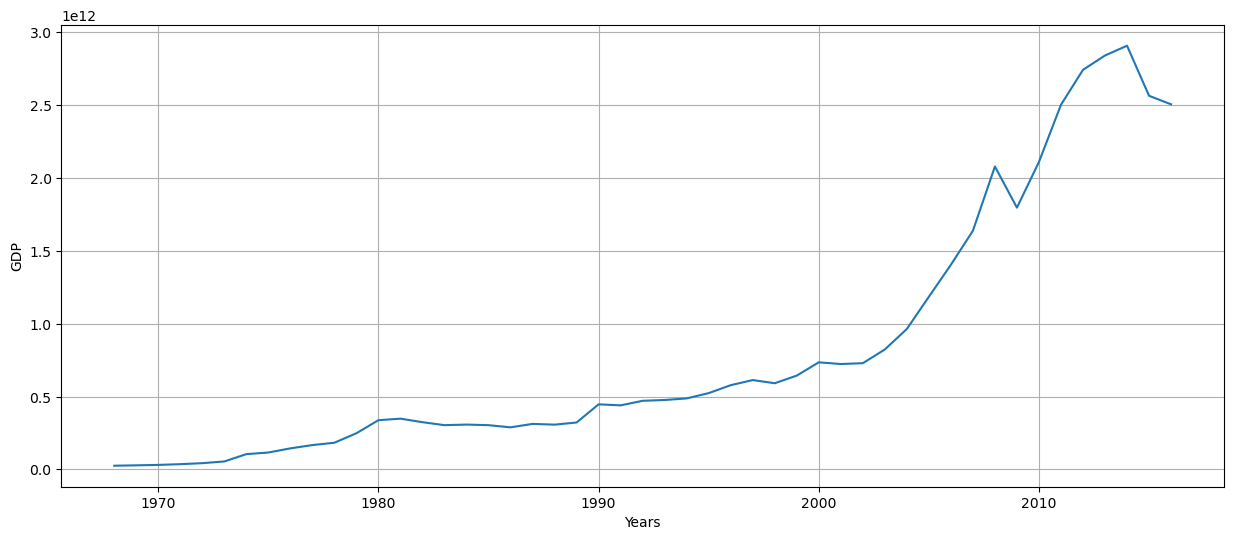

In [10]:
df_pr.plot(kind = 'line' , x = 'Year' , y = 'Value' 
           ,figsize=(15,6),
           legend=False
           ,grid = True
           ,ylabel='GDP'
           ,xlabel='Years')

In [11]:
round(((2843 - 2576) / 2576) * 100,2)

10.36

In [12]:
data = df_pr.values

gdp_change = [0]

for i in range(1,len(data)):
    
    prev = data[i-1][3]
    cur = data[i][3]
    
    gdp_change.append(round(((cur - prev) / prev)*100,2))
    
df_pr.assign(GDP = gdp_change)

final_data = []

for country_name in df['Country Name'].unique():
    
    df_pr = df[df['Country Name'] == country_name]

    data = df_pr.values
    gdp_change = [0]

    for i in range(1,len(data)):

        prev = data[i-1][3]
        cur = data[i][3]

        gdp_change.append(round(((cur - prev) / prev)*100,2))

    df_pr = df_pr.assign(GDP = gdp_change)
    final_data.append(df_pr)

In [13]:
df = pd.concat(final_data , axis = 0)

In [14]:
df

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91
...,...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10,17.72
11503,Zimbabwe,ZWE,2013,1.545177e+10,8.49
11504,Zimbabwe,ZWE,2014,1.589105e+10,2.84
11505,Zimbabwe,ZWE,2015,1.630467e+10,2.60


In [15]:
df.groupby("Country Name").max(numeric_only=True)["Value"].sort_values(ascending=False).head(50)

Country Name
World                                                   7.904923e+13
High income                                             5.036240e+13
OECD members                                            4.937008e+13
Post-demographic dividend                               4.673504e+13
IDA & IBRD total                                        2.948247e+13
Low & middle income                                     2.870476e+13
Middle income                                           2.829277e+13
IBRD only                                               2.739661e+13
Europe & Central Asia                                   2.365470e+13
East Asia & Pacific                                     2.248043e+13
Upper middle income                                     2.221220e+13
North America                                           2.016030e+13
Late-demographic dividend                               1.970310e+13
European Union                                          1.913667e+13
United States        

In [16]:
df.head()

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91


In [22]:
df_pr=df[df["Country Name"] == "World"]

fig = px.line(df_pr, x = 'Year' , y= 'Value' , title='World GDP Analysis')

fig

In [18]:
pyo.plot(fig , filename= 'World GDP.html')

'World GDP.html'


GDP of Each Country

In [23]:
os.mkdir('GDP Individual')

for country_name in df['Country Name'].unique():
    
    df_pr = df[df['Country Name'] == country_name]
    fig = px.line(df_pr, x = 'Year', y = 'Value', title = country_name + ' GDP Analysis')
    pyo.plot(fig, filename = 'GDP Individual/' + country_name + '.html', auto_open = False)